In [1]:
pip install faiss-cpu matplotlib numpy joblib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b1/79/0d1c165eac44405a86478082e225fce87874f7198300bbebc55faaf6d28d/matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/01/c8/fadd0b92ffa7b5eb5949bf340a63a4a496a6930a6c37a7ba0f12acb076d6/contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/0e/4d/1eaaad22781d55f49d1b184563842172aeb6a4f


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


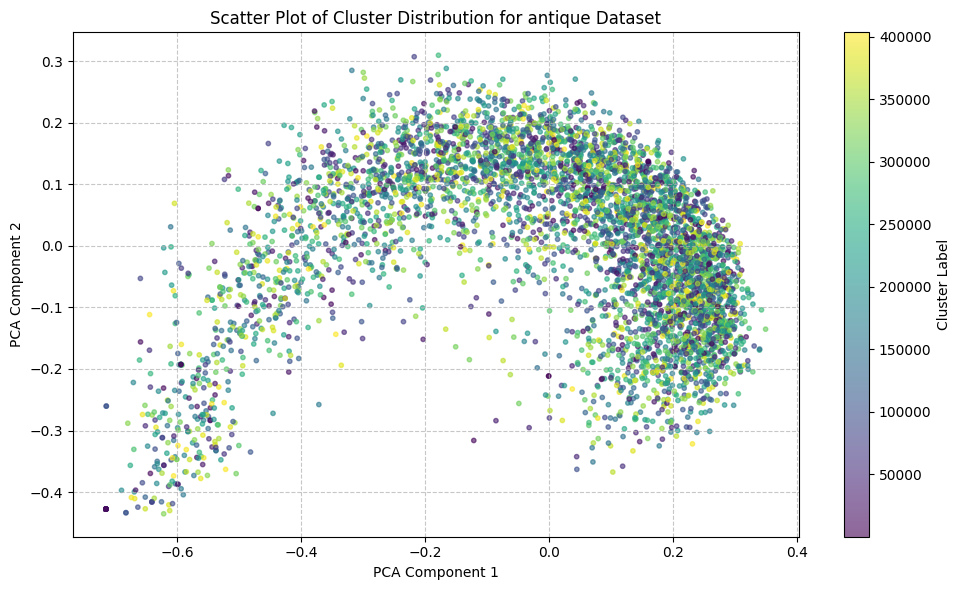

<Figure size 640x480 with 0 Axes>

In [3]:
import faiss
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.decomposition import PCA

# تحديد مسار الملفات
dataset_name = "antique"  # استبدل باسم مجموعة البيانات الخاصة بك
index_path = f"data/{dataset_name}/embedding_index.faiss"
embeddings_path = f"data/{dataset_name}/embeddings_matrix.joblib"

# تحميل الفهرس FAISS
if not os.path.exists(index_path):
    raise FileNotFoundError(f"FAISS index file not found at {index_path}")

index = faiss.read_index(index_path)

# تحميل المتجهات الأصلية
if not os.path.exists(embeddings_path):
    raise FileNotFoundError(f"Embeddings file not found at {embeddings_path}")

embeddings = joblib.load(embeddings_path)

# التحقق من توافق الأبعاد
if embeddings.shape[0] != index.ntotal:
    print(f"Warning: Number of vectors ({embeddings.shape[0]}) does not match index size ({index.ntotal})")
    embeddings = embeddings[:index.ntotal]

# أخذ عينة من المتجهات للتحليل (لأن جميع المتجهات قد تكون كبيرة جدًا)
n_samples = min(5000, embeddings.shape[0])  # عدد العينات (يمكن زيادته حسب الموارد)
sample_indices = np.random.choice(embeddings.shape[0], n_samples, replace=False)
sample_embeddings = embeddings[sample_indices]

# تقليل الأبعاد باستخدام PCA إلى 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(sample_embeddings)

# البحث عن أقرب الجيران لتحديد الكلاسترات (تقريبي)
k = 5  # عدد الجيران
distances, indices = index.search(sample_embeddings, k)
cluster_labels = indices[:, 0]  # نأخذ أقرب جار كتسمية كلاستر

# إنشاء الرسم البياني
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, s=10)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Scatter Plot of Cluster Distribution for {dataset_name} Dataset')

# تحسين العرض
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# عرض الرسم
plt.show()

# حفظ الرسم (اختياري)
plt.savefig(f'data/{dataset_name}/cluster_scatter.png')

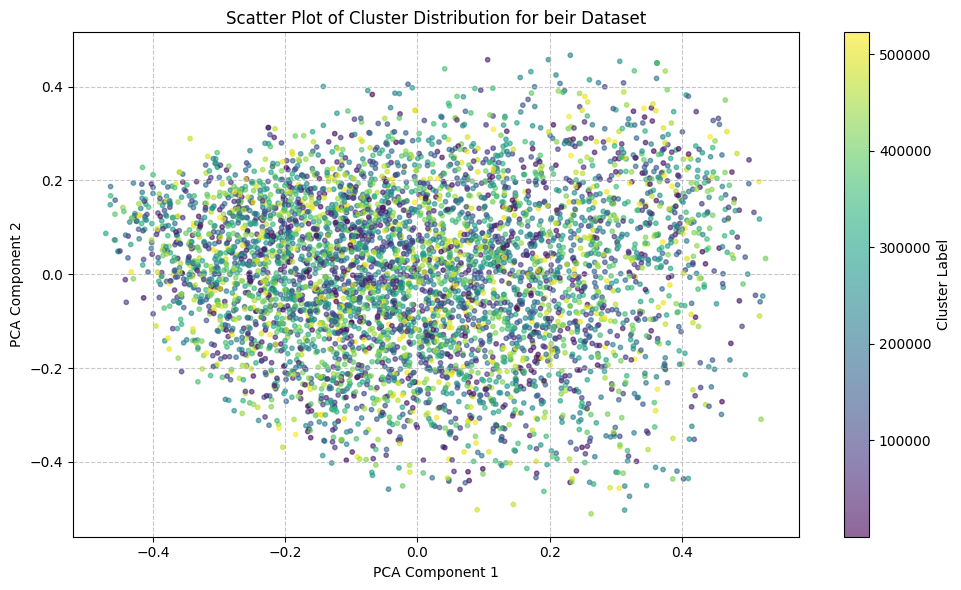

<Figure size 640x480 with 0 Axes>

In [4]:
import faiss
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.decomposition import PCA

# تحديد مسار الملفات
dataset_name = "beir"  # استبدل باسم مجموعة البيانات الخاصة بك
index_path = f"data/{dataset_name}/embedding_index.faiss"
embeddings_path = f"data/{dataset_name}/embeddings_matrix.joblib"

# تحميل الفهرس FAISS
if not os.path.exists(index_path):
    raise FileNotFoundError(f"FAISS index file not found at {index_path}")

index = faiss.read_index(index_path)

# تحميل المتجهات الأصلية
if not os.path.exists(embeddings_path):
    raise FileNotFoundError(f"Embeddings file not found at {embeddings_path}")

embeddings = joblib.load(embeddings_path)

# التحقق من توافق الأبعاد
if embeddings.shape[0] != index.ntotal:
    print(f"Warning: Number of vectors ({embeddings.shape[0]}) does not match index size ({index.ntotal})")
    embeddings = embeddings[:index.ntotal]

# أخذ عينة من المتجهات للتحليل (لأن جميع المتجهات قد تكون كبيرة جدًا)
n_samples = min(5000, embeddings.shape[0])  # عدد العينات (يمكن زيادته حسب الموارد)
sample_indices = np.random.choice(embeddings.shape[0], n_samples, replace=False)
sample_embeddings = embeddings[sample_indices]

# تقليل الأبعاد باستخدام PCA إلى 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(sample_embeddings)

# البحث عن أقرب الجيران لتحديد الكلاسترات (تقريبي)
k = 5  # عدد الجيران
distances, indices = index.search(sample_embeddings, k)
cluster_labels = indices[:, 0]  # نأخذ أقرب جار كتسمية كلاستر

# إنشاء الرسم البياني
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, s=10)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Scatter Plot of Cluster Distribution for {dataset_name} Dataset')

# تحسين العرض
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# عرض الرسم
plt.show()

# حفظ الرسم (اختياري)
plt.savefig(f'data/{dataset_name}/cluster_scatter.png')